# User Engagement Analysis

In [1]:
#importing libraries for this operation
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from statistics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# packages for path locations
import os
import sys
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')

In [3]:
df = pd.read_csv('../data/cleaned_telecom_data.csv')
df.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics:
* sessions frequency
* the duration of the session
* the sessions total traffic (download and upload (bytes))

In [4]:
df['sessions frequency'] = df.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [5]:
df_new = df[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [6]:
df_new.head(10)

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,5.173738e+14,1823652.0,1
1,3.360100e+10,1.234090e+15,1365104.0,1
2,3.360100e+10,7.183836e+14,1361762.0,1
3,3.360101e+10,1.638393e+15,1321509.0,1
4,3.360101e+10,1.158391e+15,1089009.0,2
5,3.360101e+10,1.439738e+15,1074638.0,2
6,3.360101e+10,9.221408e+14,1035261.0,2
7,3.360101e+10,1.371765e+15,951292.0,1
8,3.360101e+10,1.076896e+15,941634.0,2
9,3.360102e+10,9.378444e+14,864482.0,1


#### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric.

In [7]:
df_new.describe()

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
count,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000
mean,4.511474e+10,9.166177e+14,9.662336e+04,1.403768
std,2.889423e+12,3.445153e+14,8.395441e+04,0.815371
min,3.360100e+10,5.836229e+13,7.142000e+03,1.000000
25%,3.365088e+10,6.691826e+14,4.085950e+04,1.000000
50%,3.366365e+10,9.166781e+14,8.639900e+04,1.000000
75%,3.368344e+10,1.164285e+15,1.188535e+05,2.000000
max,8.823971e+14,1.780674e+15,1.823652e+06,18.000000


### Top 10 customers on duration of session

In [8]:
# Top 10 customers on duration of session
df_new.sort_values(by='Dur. (ms)',ascending=False, inplace=True, ignore_index=True)
TopDuration = df_new[['MSISDN/Number', 'Dur. (ms)']].head(10)

In [10]:
TopDuration

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,1823652.0
1,3.376359e+10,1679813.0
2,3.376359e+10,1634983.0
3,3.376359e+10,1573420.0
4,3.365049e+10,1480875.0
5,3.365049e+10,1474663.0
6,3.365049e+10,1468680.0
7,3.366278e+10,1392232.0
8,3.366278e+10,1382408.0
9,3.366278e+10,1378034.0


In [11]:
TopDuration.to_csv('../data/top10_user_session.csv')

### Top 10 customers on session frequency

In [10]:
# Top 10 customers on session frequency
df_new.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
TopSessionfrq = df_new[['MSISDN/Number', 'sessions frequency']].head(10)

In [11]:
TopSessionfrq

,MSISDN/Number,sessions frequency
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.376054e+10,15
5,3.367588e+10,15
6,3.366716e+10,13
7,3.362708e+10,12
8,3.378632e+10,12
9,3.376041e+10,12


### Top 10 customers on Total Downloads and Uploads

In [12]:
#Top 10 customers on Total Downloads and Uploads
df_new.sort_values(by='Total UL and DL', ascending=False, inplace=True, ignore_index=True)
TopDLUL = df_new[['MSISDN/Number', 'Total UL and DL']].head(10)

In [14]:
TopDLUL

,MSISDN/Number,Total UL and DL
0,3.366005e+10,1.780674e+15
1,3.376118e+10,1.772824e+15
2,3.366881e+10,1.771882e+15
3,3.365100e+10,1.769959e+15
4,3.378510e+10,1.769330e+15
5,3.366871e+10,1.765674e+15
6,3.362335e+10,1.764959e+15
7,3.360657e+10,1.762451e+15
8,3.376217e+10,1.761169e+15
9,3.369842e+10,1.760919e+15


In [15]:
TopDLUL.to_csv('../data/top10_DLUL_users.csv')

# Normalizing selected columns

## Before Normalizing

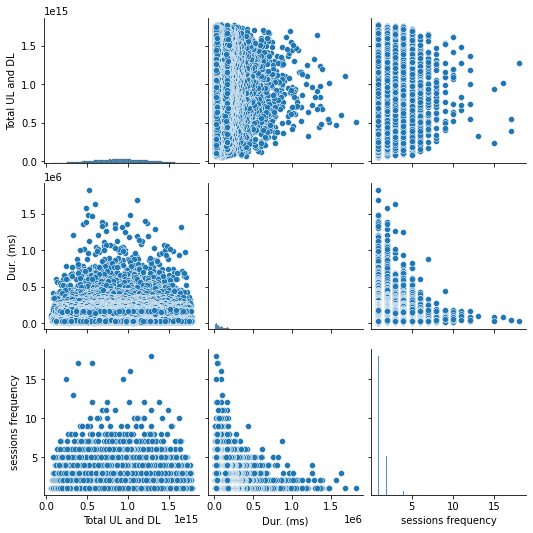

In [14]:
sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])

In [15]:
df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']].describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,1.068560e+05,1.068560e+05,106856.000000
mean,9.166177e+14,9.662336e+04,1.403768
std,3.445153e+14,8.395441e+04,0.815371
min,5.836229e+13,7.142000e+03,1.000000
25%,6.691826e+14,4.085950e+04,1.000000
50%,9.166781e+14,8.639900e+04,1.000000
75%,1.164285e+15,1.188535e+05,2.000000
max,1.780674e+15,1.823652e+06,18.000000


### `normalize Total UL and DL`

In [16]:
normalize_column_df = pd.DataFrame(df['Total UL and DL'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['Total UL and DL'] = scaled_values

### `normalize Duration`

In [17]:
normalize_column_df = pd.DataFrame(df['Dur. (ms)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['Dur. (ms)'] = scaled_values

### `normalize Sessions Frequency`

In [18]:
normalize_column_df = pd.DataFrame(df['sessions frequency'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['sessions frequency'] = scaled_values

### After normalizing

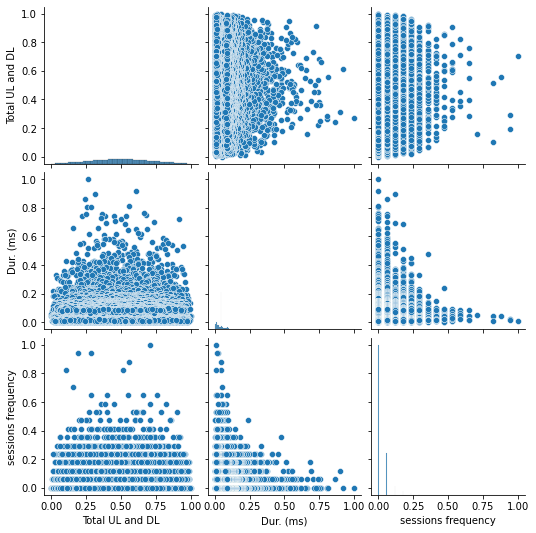

In [19]:
sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])

In [20]:
df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']].describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,106856.000000,106856.000000,106856.000000
mean,0.498316,0.049260,0.023751
std,0.200031,0.046217,0.047963
min,0.000000,0.000000,0.000000
25%,0.354651,0.018562,0.000000
50%,0.498351,0.043631,0.000000
75%,0.642115,0.061498,0.058824
max,1.000000,1.000000,1.000000


# Standardizing selected columns 

In [21]:
df2 = pd.read_csv('../data/cleaned_telecom_data.csv')

In [22]:
df2['sessions frequency'] = df2.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [23]:
df2_new = df2[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [24]:
standardized_df = pd.DataFrame(df2['Total UL and DL'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['Total UL and DL'] = std_data

In [25]:
standardized_df = pd.DataFrame(df2['Dur. (ms)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['Dur. (ms)'] = std_data

In [26]:
standardized_df = pd.DataFrame(df2['sessions frequency'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['sessions frequency'] = std_data

In [29]:
df2_new = df2[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [30]:
df2_new.head()

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,-1.158862,20.571127,-0.495197
1,3.360100e+10,0.921507,15.109232,-0.495197
2,3.360100e+10,-0.575403,15.069424,-0.495197
3,3.360101e+10,2.095055,14.589959,-0.495197
4,3.360101e+10,0.701781,11.820586,0.731244


In [31]:
df2_new.index = df2_new['MSISDN/Number']
df2_new = df2_new.iloc[:,1:4]

In [32]:
df2_new.head()

,Total UL and DL,Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-1.158862,20.571127,-0.495197
3.360100e+10,0.921507,15.109232,-0.495197
3.360100e+10,-0.575403,15.069424,-0.495197
3.360101e+10,2.095055,14.589959,-0.495197
3.360101e+10,0.701781,11.820586,0.731244


# K-means

In [33]:
df_nor = df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [34]:
df_nor.head(10)

,Total UL and DL,Dur. (ms),sessions frequency
0,0.266509,1.000000,0.000000
1,0.682645,0.747566,0.000000
2,0.383218,0.745727,0.000000
3,0.917389,0.723567,0.000000
4,0.638693,0.595574,0.058824
5,0.802047,0.587663,0.058824
6,0.501523,0.565986,0.058824
7,0.762581,0.519760,0.000000
8,0.591376,0.514444,0.058824
9,0.510640,0.471971,0.000000


In [35]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_nor)
label = kmeans.predict(df_nor)

In [36]:
df_kclus = pd.DataFrame(df_nor)
df_kclus['clusters'] = label

In [37]:
df_kclus.head()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
0,0.266509,1.000000,0.000000,2
1,0.682645,0.747566,0.000000,0
2,0.383218,0.745727,0.000000,1
3,0.917389,0.723567,0.000000,0
4,0.638693,0.595574,0.058824,0


In [38]:
centroids = kmeans.cluster_centers_

In [39]:
centroids

array([[0.74013526, 0.04907868, 0.02418091],
       [0.49534221, 0.04941456, 0.02338268],
       [0.25152436, 0.04920653, 0.02388124]])

In [40]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

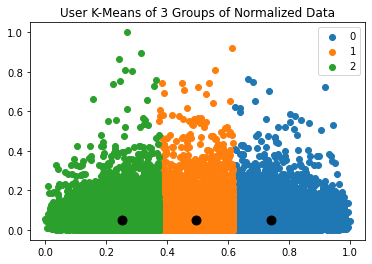

In [41]:
# plot
plt.title('User K-Means of 3 Groups of Normalized Data')
for i in u_labels:
    plt.scatter(df_nor[label == i].iloc[:,0] , df_nor[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

### min, max, avg and total non-normalized metrics

In [42]:
# forming cluster dataframe
cm = pd.DataFrame()
cm['index_d'] = df_nor.index.values
cm['cluster'] = kmeans.labels_

In [43]:
# cluster 1
nor_cluster1 = cm[cm.cluster == 0].iloc[:,0].values.tolist()
cluster_1_df = df_nor.loc[nor_cluster1,:]

In [44]:
# cluster 2
nor_cluster2 = cm[cm.cluster == 1].iloc[:,0].values.tolist()
cluster_2_df = df_nor.loc[nor_cluster2,:]

In [45]:
# cluster 3
nor_cluster3 = cm[cm.cluster == 2].iloc[:,0].values.tolist()
cluster_3_df = df_nor.loc[nor_cluster3,:]

### min, max and average values of the 3 clusters

In [46]:
cluster_1_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
count,30714.000000,30714.000000,30714.000000,30714.0
mean,0.740507,0.049093,0.024200,0.0
std,0.087298,0.045395,0.048408,0.0
min,0.617327,0.000078,0.000000,0.0
25%,0.667020,0.018749,0.000000,0.0
50%,0.725135,0.043631,0.000000,0.0
75%,0.802201,0.061060,0.058824,0.0
max,1.000000,0.762501,1.000000,0.0


In [47]:
cluster_2_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
count,46415.000000,46415.000000,46415.000000,46415.0
mean,0.495850,0.049411,0.023382,1.0
std,0.067767,0.046316,0.047177,0.0
min,0.373417,0.000002,0.000000,1.0
25%,0.439472,0.018723,0.000000,1.0
50%,0.496048,0.043631,0.000000,1.0
75%,0.552263,0.061748,0.058824,1.0
max,0.617815,0.920816,0.882353,1.0


In [48]:
cluster_3_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
count,29727.000000,29727.000000,29727.000000,29727.0
mean,0.251933,0.049197,0.023862,2.0
std,0.086398,0.046902,0.048710,0.0
min,0.000000,0.000000,0.000000,2.0
25%,0.191283,0.018181,0.000000,2.0
50%,0.266566,0.043631,0.000000,2.0
75%,0.324934,0.061521,0.058824,2.0
max,0.373596,1.000000,0.941176,2.0


### non-normalized metrics

In [49]:
df_beforN = pd.read_csv('../data/cleaned_telecom_data.csv')

In [50]:
df_beforN['sessions frequency'] = df_beforN.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [51]:
df_Bnew = df_beforN[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [52]:
df_Bnew.head()

,Total UL and DL,Dur. (ms),sessions frequency
0,5.173738e+14,1823652.0,1
1,1.234090e+15,1365104.0,1
2,7.183836e+14,1361762.0,1
3,1.638393e+15,1321509.0,1
4,1.158391e+15,1089009.0,2


In [53]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_Bnew)
label = kmeans.predict(df_Bnew)

In [54]:
df_kclus = pd.DataFrame(df_Bnew)
df_kclus['clusters'] = label

In [55]:
df_kclus.head()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
0,5.173738e+14,1823652.0,1,1
1,1.234090e+15,1365104.0,1,0
2,7.183836e+14,1361762.0,1,2
3,1.638393e+15,1321509.0,1,0
4,1.158391e+15,1089009.0,2,0


In [56]:
centroids = kmeans.cluster_centers_

In [57]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

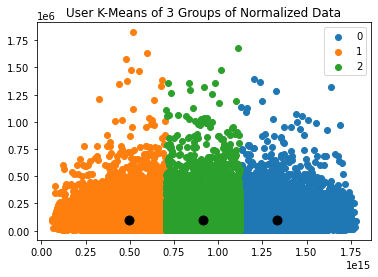

In [58]:
# plot
plt.title('User K-Means of 3 Groups of Normalized Data')
for i in u_labels:
    plt.scatter(df_Bnew[label == i].iloc[:,0] , df_Bnew[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

## Aggregation of user total traffic per application ###

In [59]:
df_agg = pd.read_csv('../data/cleaned_telecom_data.csv')

In [60]:
df_agg.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


## Top 10 Youtube users

In [61]:
# sort Youtube_total_data to get the most engaged users in the app
df_agg.sort_values(by=['Youtube_Total_Data'],ascending=False, inplace=True)
top10_youtube_user=df_agg[['MSISDN/Number', 'Youtube_Total_Data']].head(10)
top10_youtube_user.to_csv("../data/top10_youtube_users.csv",index=False)

In [62]:
top10_youtube_user

,MSISDN/Number,Youtube_Total_Data
66493,3.366762e+10,4.519008e+13
102091,3.376945e+10,4.517901e+13
15638,3.362999e+10,4.517004e+13
45398,3.366174e+10,4.510883e+13
13805,3.362673e+10,4.509337e+13
68228,3.366816e+10,4.509153e+13
95150,3.376148e+10,4.507447e+13
54943,3.366404e+10,4.507180e+13
18366,3.363651e+10,4.504979e+13
53530,3.366368e+10,4.504017e+13


## Top 10 Google users

In [63]:
# sort Google to get the most engaged users in the app
df_agg.sort_values(by=['Google_Total_Data'],ascending=False, inplace=True)
top10_google_user=df_agg[['MSISDN/Number', 'Google_Total_Data']].head(10)
top10_google_user.to_csv("../data/top10_google_users.csv",index=False)

In [64]:
top10_google_user

,MSISDN/Number,Google_Total_Data
92913,3.376053e+10,1.552878e+13
48780,3.366249e+10,1.551732e+13
80821,3.368482e+10,1.550857e+13
27384,3.365113e+10,1.550713e+13
3297,3.360993e+10,1.550645e+13
53075,3.366356e+10,1.550614e+13
82610,3.368841e+10,1.549392e+13
90229,3.369997e+10,1.548365e+13
16844,3.363264e+10,1.548131e+13
74104,3.367154e+10,1.547971e+13


## Top 10 Email users

In [65]:
# sort Email_total_data to get the most engaged users in the app
df_agg.sort_values(by=['Email_Total_Data'],ascending=False, inplace=True)
top10_email_user=df_agg[['MSISDN/Number', 'Email_Total_Data']].head(10)
top10_email_user.to_csv("../data/top10_email_users.csv",index=False)

In [66]:
top10_email_user

,MSISDN/Number,Email_Total_Data
43873,3.366137e+10,4.518036e+12
88190,3.369935e+10,4.513579e+12
14756,3.362843e+10,4.513000e+12
57130,3.366468e+10,4.512730e+12
28657,3.365267e+10,4.510915e+12
103717,3.378103e+10,4.510178e+12
79122,3.368142e+10,4.507049e+12
44304,3.366147e+10,4.504056e+12
100124,3.376363e+10,4.502041e+12
38551,3.366009e+10,4.499429e+12


## Top 10 Social media users

In [67]:
# sort social media to get the most engaged users in the app
df_agg.sort_values(by=['Social_Media_Total_Data'],ascending=False, inplace=True)
top10_socialM_user=df_agg[['MSISDN/Number', 'Social_Media_Total_Data']].head(10)
top10_socialM_user.to_csv("../data/top10_socialMedia_users.csv",index=False)

In [68]:
top10_socialM_user

,MSISDN/Number,Social_Media_Total_Data
32217,3.365869e+10,3.650861e+12
105238,3.378317e+10,3.650240e+12
50251,3.366283e+10,3.648729e+12
98107,3.376261e+10,3.648659e+12
31907,3.365863e+10,3.648092e+12
45504,3.366176e+10,3.648027e+12
11151,3.362249e+10,3.647700e+12
9945,3.362060e+10,3.647486e+12
7417,3.361647e+10,3.647484e+12
74797,3.367289e+10,3.646924e+12


## Top 10 Netflix users

In [69]:
# sort netflix to get the most engaged users in the app
df_agg.sort_values(by=['Netflix_Total_Data'],ascending=False, inplace=True)
top10_netflix_user=df_agg[['MSISDN/Number', 'Netflix_Total_Data']].head(10)
top10_netflix_user.to_csv("../data/top10_netflix_users.csv",index=False)

In [70]:
top10_netflix_user

,MSISDN/Number,Netflix_Total_Data
60136,3.366548e+10,4.519815e+13
38586,3.366009e+10,4.511036e+13
25959,3.365071e+10,4.506474e+13
72644,3.366965e+10,4.505436e+13
56035,3.366436e+10,4.501295e+13
54868,3.366402e+10,4.499895e+13
18413,3.363673e+10,4.498365e+13
86468,3.369879e+10,4.497063e+13
27100,3.365096e+10,4.491554e+13
5081,3.361276e+10,4.490332e+13


## Top 10 Game app users

In [71]:
# sort gameers to get the most engaged users in the app
df_agg.sort_values(by=['Gaming_Total_Data'],ascending=False, inplace=True)
top10_game_user=df_agg[['MSISDN/Number', 'Gaming_Total_Data']].head(10)
top10_game_user.to_csv("../data/top10_gameApp_users.csv",index=False)

In [72]:
top10_game_user

,MSISDN/Number,Gaming_Total_Data
82105,3.368740e+10,8.592028e+14
76363,3.367588e+10,8.590109e+14
2886,3.360923e+10,8.589021e+14
44290,3.366146e+10,8.587352e+14
66388,3.366759e+10,8.586528e+14
11706,3.362335e+10,8.585627e+14
28398,3.365229e+10,8.585064e+14
71916,3.366938e+10,8.583671e+14
28019,3.365182e+10,8.581997e+14
46343,3.366194e+10,8.581537e+14


## Top 10 Other activity users

In [73]:
# sort gameers to get the most engaged users in the app
df_agg.sort_values(by=['Other_Total_Data'],ascending=False, inplace=True)
top10_other_user=df_agg[['MSISDN/Number', 'Other_Total_Data']].head(10)
top10_other_user.to_csv("../data/top10_otherAct_users.csv",index=False)

In [74]:
top10_other_user

,MSISDN/Number,Other_Total_Data
104253,3.378177e+10,8.595209e+14
86643,3.369884e+10,8.594856e+14
102717,3.377080e+10,8.592853e+14
87257,3.369904e+10,8.591889e+14
36065,3.365950e+10,8.590537e+14
24097,3.365028e+10,8.589266e+14
97609,3.376235e+10,8.588747e+14
83452,3.369512e+10,8.588496e+14
18393,3.363660e+10,8.587877e+14
49947,3.366277e+10,8.585556e+14


# Most Used Applications

In [75]:
df_agg.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
104253,3.378177e+10,1,3.186206e+13,1.576006e+15,1.607868e+15,3.073834e+13,3.800935e+12,2.619031e+12,2.213932e+12,1.604209e+13,...,26.0,173097.0,173097073.0,32885.0,92.0,Samsung,Samsung Galaxy S8 (Sm-G950F),L17542B,2.082010e+14,3.517171e+13
86643,3.369884e+10,5,5.118779e+13,9.796232e+14,1.030811e+15,2.663447e+13,8.470152e+12,3.407370e+12,7.157290e+11,1.985751e+13,...,39.0,42571.0,42571408.0,506792.0,7978.0,Lenovo,Lenovo Nexus 6 Valocia,D51891A,2.082010e+14,3.554701e+13
102717,3.377080e+10,1,5.570247e+13,1.670223e+15,1.725925e+15,1.212793e+13,2.532434e+12,3.111951e+12,9.862130e+11,3.718895e+13,...,39.0,212967.0,212967540.0,0.0,15.0,Samsung,Samsung Galaxy Note 8 (Sm-N950F),T77514B,2.082015e+14,3.540751e+13
87257,3.369904e+10,2,4.103083e+13,9.121918e+14,9.532227e+14,2.816599e+13,7.301393e+12,2.745798e+12,3.613850e+11,1.860784e+13,...,85.0,42329.0,42329005.0,126875.0,2703.0,Apple,Apple iPhone X (A1901),D21059A,2.082015e+14,3.548601e+13
36065,3.365950e+10,1,3.624718e+13,1.678341e+15,1.714588e+15,1.428620e+13,1.020697e+13,1.550181e+12,1.661635e+12,1.313536e+13,...,83.0,86399.0,86399921.0,10457657.0,56647.0,Huawei,Huawei B528S-23A,L78134C,2.082017e+14,8.637690e+13


In [76]:
apps=df_agg[['Youtube_Total_Data','Google_Total_Data','Email_Total_Data',
                'Social_Media_Total_Data','Netflix_Total_Data','Gaming_Total_Data', 'Other_Total_Data']]

In [77]:
apps.head()

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data
104253,3.073834e+13,3.800935e+12,2.619031e+12,2.213932e+12,1.604209e+13,6.929330e+14,8.595209e+14
86643,2.663447e+13,8.470152e+12,3.407370e+12,7.157290e+11,1.985751e+13,1.122402e+14,8.594856e+14
102717,1.212793e+13,2.532434e+12,3.111951e+12,9.862130e+11,3.718895e+13,8.106923e+14,8.592853e+14
87257,2.816599e+13,7.301393e+12,2.745798e+12,3.613850e+11,1.860784e+13,3.685137e+13,8.591889e+14
36065,1.428620e+13,1.020697e+13,1.550181e+12,1.661635e+12,1.313536e+13,8.146938e+14,8.590537e+14


In [78]:
# sum of column values to get total data used
sum_column = apps.sum(axis=0)

In [79]:
df_app = pd.DataFrame({'Application':sum_column.index, 'Total Data used':sum_column.values})
df_app.sort_values(by=['Total Data used'],ascending=False, inplace=True)
df_apps = df_app.head(4)

In [80]:
df_apps

,Application,Total Data used
5,Gaming_Total_Data,4.602173e+19
6,Other_Total_Data,4.581798e+19
4,Netflix_Total_Data,2.419100e+18
0,Youtube_Total_Data,2.416475e+18


## Top 3 Frequently used apps are:
* Gaming Apps
* Netflix Apps
* Youtube Apps
---
* Other Apps (unknown apps)

In [81]:
df_apps.head()

,Application,Total Data used
5,Gaming_Total_Data,4.602173e+19
6,Other_Total_Data,4.581798e+19
4,Netflix_Total_Data,2.419100e+18
0,Youtube_Total_Data,2.416475e+18


In [82]:
i = df_apps[df_apps['Application'] == 'Other_Total_Data'].index

In [83]:
df_apps.drop(i, inplace=True)
df_apps

,Application,Total Data used
5,Gaming_Total_Data,4.602173e+19
4,Netflix_Total_Data,2.419100e+18
0,Youtube_Total_Data,2.416475e+18


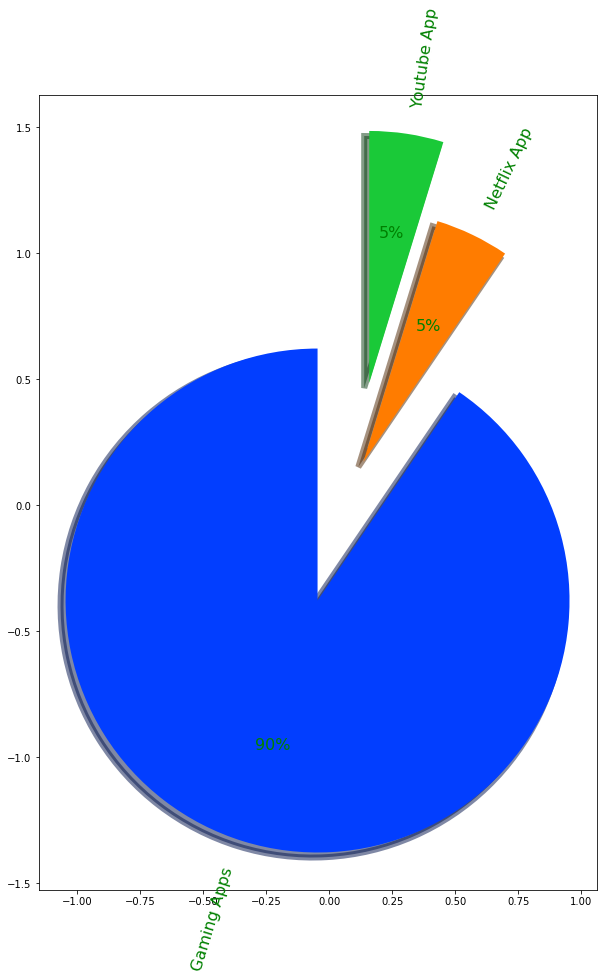

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df_apps['Total Data used'].tolist()
explode = [0.5,0.08,0.39]
labels = ['Gaming Apps', 'Netflix App', 'Youtube App']
colors = sns.color_palette('bright')
plt.figure(figsize=(10,30))
plt.pie(data,
        labels=labels,
        colors = colors,
        autopct = '%0.0f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'Green','fontsize':16},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1),
        rotatelabels = 'true')
plt.show()

## K-means for standardized data

In [87]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2_new)
    sse.append(kmeans.inertia_)

In [89]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

6

In [90]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(df2_new)
centroids = kmeans.cluster_centers_
#Getting index based on clusters
u_labels = np.unique(label)

In [91]:
df2_new['cluster'] = label
df2_new.to_csv('../data/std_engagement.csv')

In [92]:
df2_new.head()

,Total UL and DL,Dur. (ms),sessions frequency,cluster
MSISDN/Number,,,,
3.360100e+10,-1.158862,20.571127,-0.495197,0
3.360100e+10,0.921507,15.109232,-0.495197,0
3.360100e+10,-0.575403,15.069424,-0.495197,0
3.360101e+10,2.095055,14.589959,-0.495197,0
3.360101e+10,0.701781,11.820586,0.731244,0


In [93]:
centroids

array([[-1.82660846e-02,  5.43162778e+00,  4.69546490e-02],
       [-9.94812547e-03,  1.33298372e+00, -2.10175834e-01],
       [ 1.25625345e+00, -2.41265356e-01, -2.18357689e-01],
       [-1.26665806e+00, -2.53827518e-01, -2.20157984e-01],
       [ 1.01221378e-02, -5.01147151e-02,  2.80773392e+00],
       [-2.85316947e-03, -4.16421509e-01, -2.32556077e-01]])

In [94]:
centroids_df = pd.DataFrame(centroids, columns=['Total UL and DL', 'Dur. (ms)','sessions frequency'])
centroids_df.to_csv('../data/centero_engagment.csv')

In [95]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df2_new)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

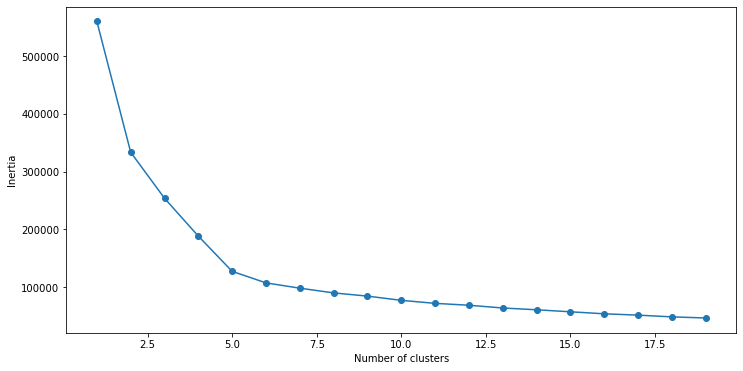

In [96]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')